In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss, confusion_matrix, roc_curve, roc_auc_score,recall_score
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\data_wo_cluster.csv")
data = data.sample(frac=1).reset_index(drop=True)

X = data.drop(columns=['CLASS'])
y = data['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
numerical_cols = [col for col in X_train.columns if col not in categorical_cols]

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Fit and transform the training data
preprocessor.fit(X_train)
X_train_encoded = preprocessor.transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, log_loss, roc_auc_score

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_encoded, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Initialize the final KNN model with the best parameters
best_knn = KNeighborsClassifier(**best_params)

# Fit the final model on the full training data
best_knn.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred = best_knn.predict(X_test_encoded)
y_pred_proba = best_knn.predict_proba(X_test_encoded)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])

# Print evaluation metrics
print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("ROC-AUC Score:", roc_auc)


Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score (Accuracy): 0.7300973324731425
Accuracy: 0.7255297679112008
Precision: 0.71
F1 Score: 0.7230142566191446
Log Loss: 0.9079643248417234
ROC-AUC Score: 0.8014188588804017


In [11]:
best_params = {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

True Positive Rate (TPR): 0.7365145228215768
False Positive Rate (FPR): 0.28487229862475444
False Negative Rate (FNR): 0.26348547717842324
True Negative Rate (TNR): 0.7151277013752456
Accuracy: 0.7255297679112008
Recall 0.7365145228215768
Precision: 0.71
F1 Score: 0.7230142566191446
Log Loss: 0.9079643248417234
ROC AUC Score: 0.8014188588804017


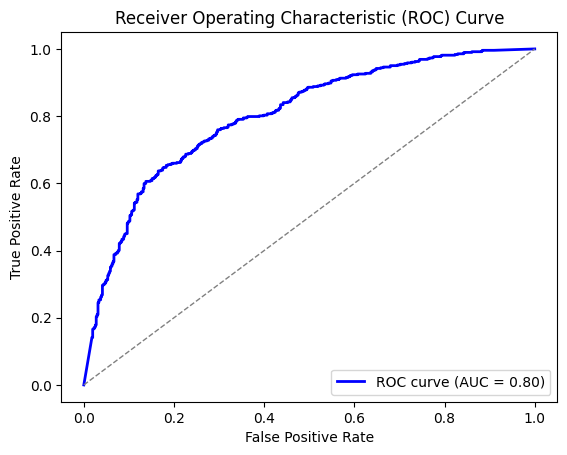

In [12]:
best_knn_classifier = KNeighborsClassifier(**best_params)

# Train the KNN classifier
best_knn_classifier.fit(X_train_encoded, y_train)

# Predictions on the test data
y_test_pred = best_knn_classifier.predict(X_test_encoded)
y_test_pred_prob = best_knn_classifier.predict_proba(X_test_encoded)

conf_matrix = confusion_matrix(y_test, y_test_pred)

TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

accuracy = accuracy_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
logloss = log_loss(y_test, y_test_pred_prob)
roc_auc = roc_auc_score(y_test, y_test_pred_prob[:, 1])
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
TNR = TN / (TN + FP)

print("True Positive Rate (TPR):", TPR)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)
print("True Negative Rate (TNR):", TNR)

print("Accuracy:", accuracy)
print("Recall", recall)
print("Precision:", precision)
print("F1 Score:", f1)
print("Log Loss:", logloss)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob[:, 1])
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Confusion Matrix:
[[364 145]
 [127 355]]


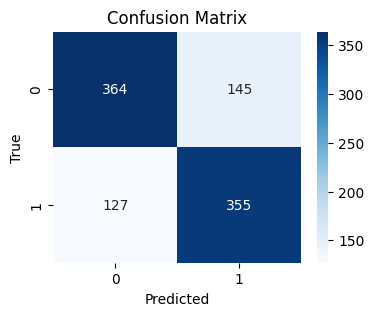

In [13]:
import seaborn as sns
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(4, 3))  # Adjust the figsize as needed
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [8]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\NEW_TESTING.csv")
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Aspect', 'Curvature', 'Dist_from_Lineaments',
                                  'Slope', 'SPI', 'TRI']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['LULC', 'Geomorphology', 'Soil',
                                  'Lithology'])])

In [9]:
X_new_encoded = preprocessor.transform(new_data)

In [10]:
y_pred_prob_new = best_knn_classifier.predict_proba(X_new_encoded)

In [11]:
import pandas as pd

prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability_class_0', 'Probability_class_1'])

new_data_with_prob = pd.concat([new_data, prob_df], axis=1)

new_data_with_prob.to_csv('knn_cat_one_lulc3_method_with_probabilities.csv', index=False)

In [14]:
new_data = pd.read_csv(r"C:\Users\beher\OneDrive\Desktop\NEW_METHOD\ls_merge_data.csv")
preprocessor.fit(X_train)

X_new_encoded = preprocessor.transform(new_data)
y_pred_prob_new = best_knn_classifier.predict_proba(X_new_encoded)
import pandas as pd

prob_df = pd.DataFrame(y_pred_prob_new, columns=['Probability_class_0', 'Probability_class_1'])

new_data_with_prob = pd.concat([new_data, prob_df], axis=1)

new_data_with_prob.to_csv('KNN_NEWSHING_lulc3_method_with_probabilities.csv', index=False)